Análisis Sentimientos

En este fichero se utilizarán los comentarios extraidos de la temporada 2022 y 2023 para realizar el análisis de sentimientos. La extracción de los comentarios de 2020 ha sido realizado enun ficher igual al anterior, únicamente modificando la temporada.

A continuación juntamos ambos ficheros de comentarios para comenzar con el análisis

In [2]:
import pandas as pd

df=pd.read_csv(r"C:\Users\gonza\OneDrive\Escritorio\Universidad\4to curso\MINERIA DE DATOS\TRABAJO FINAL\DATOS EXTRAIDOS\comentarios_2023.csv")
df2=pd.read_csv(r"C:\Users\gonza\Downloads\comentarios_2022.csv")

df=pd.concat([df,df2], axis=0, ignore_index=True)

Importamos todas las librerías y recursos necesarios

In [3]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Descargar recursos necesarios
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')





[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gonza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gonza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gonza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gonza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gonza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Definimos la función para preprocesar el texto y la aplicamos

In [4]:
# Paso 1: Preprocesar comentarios
def preprocesar_texto(texto):
    tokens = word_tokenize(texto.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)



df['comentario_procesado'] = df['Comentario'].apply(preprocesar_texto)



Analizamos el sentimiento con VADER

In [5]:
from textblob import TextBlob
# Paso 2: Análisis de sentimientos con VADER
analyzer = SentimentIntensityAnalyzer()

def analizar_sentimiento_vader(texto):
    sentimiento = analyzer.polarity_scores(texto)
    return sentimiento['compound']  # Devuelve la polaridad compuesta: Rango de -1 (negativo) a 1 (positivo)

df['sentimiento'] = df['comentario_procesado'].apply(analizar_sentimiento_vader)



Agrupamos el resultado por carrera para extraer sentimientos por carrera

In [6]:
# Paso 3: Agregar resultados por carrera
resumen_carreras = df.groupby('raceId')['sentimiento'].agg(
    promedio='mean',
    mediana='median',
    desviacion_std='std',
    comentarios_totales='count'
).reset_index()



Clasificamos las carreras en entretenidas o neutrales

In [7]:
# Paso 4: Clasificación de carreras
def clasificar_carrera(promedio_sentimiento):
    if promedio_sentimiento > 0.2:
        return 'Entretenida'
    else:
        return 'Neutral'

resumen_carreras['clasificacion'] = resumen_carreras['promedio'].apply(clasificar_carrera)

# Agregar clasificación al DataFrame principal
df = df.merge(resumen_carreras[['raceId', 'clasificacion']], on='raceId', how='left')



Generamos una nube de palabras para las categorías

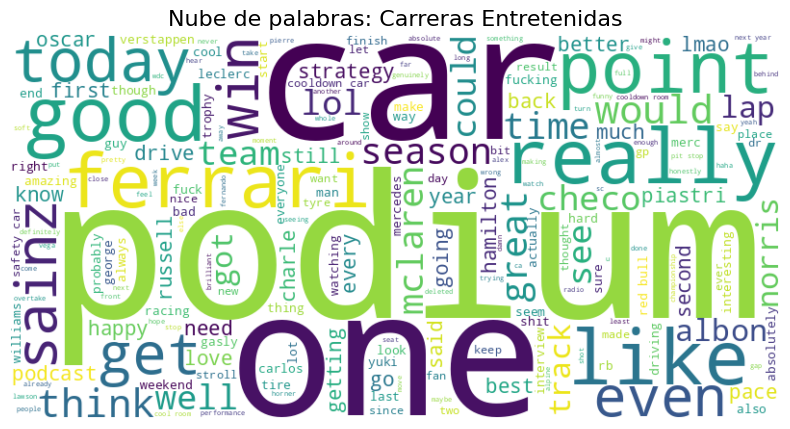

In [69]:
# Paso 5: Generar nubes de palabras para cada clasificación
palabras_exc=['max','race','lewis','alonso','driver','perez','lando']
def generar_nube_palabras(dataframe, clasificacion, titulo):
    texto = ' '.join(dataframe[dataframe['clasificacion'] == clasificacion]['comentario_procesado'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',stopwords=palabras_exc).generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16)
    plt.show()

# Generar nubes de palabras
generar_nube_palabras(df, 'Entretenida', 'Nube de palabras: Carreras Entretenidas')


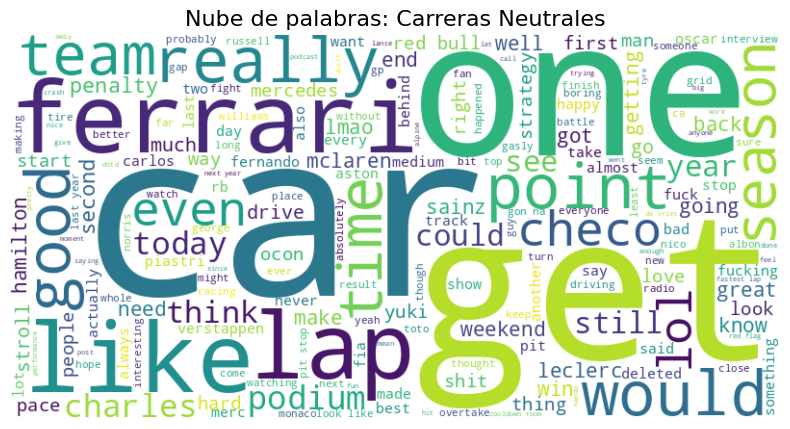

In [70]:
generar_nube_palabras(df, 'Neutral', 'Nube de palabras: Carreras Neutrales')


Exportamos los resultados a un fichero csv

In [8]:
resumen_carreras.to_csv(r"C:\Users\gonza\OneDrive\Escritorio\Universidad\4to curso\MINERIA DE DATOS\TRABAJO FINAL\sentimientos_carreras.csv",index=False)